In [2]:
!pip install pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Total_Pop = 14810000
Datas = np.arange('2020-03-01', '2020-11-20', dtype='datetime64[D]')

In [4]:
# use scypy interpolation?
def med_movel(df, start, end, column):
    start = pd.Timedelta(days = int(start))
    end   = pd.Timedelta(days = int(end))
    idx = df.index.values
    return np.array([df.loc[np.logical_and(day - idx < end, day - idx >= start), column].mean() for day in Datas])

,tcases,ncases,tdeaths,ndeaths
date,,,,
2020-01-31,3,0,0.0,0.0
2020-02-08,3,0,0.0,0.0
2020-02-16,3,0,0.0,0.0
2020-02-21,3,0,0.0,0.0
2020-02-24,4,1,0.0,0.0
...,...,...,...,...
2020-11-17,222799,2231,10058.0,36.0
2020-11-18,225395,2596,10125.0,67.0
2020-11-19,227812,2417,10187.0,62.0


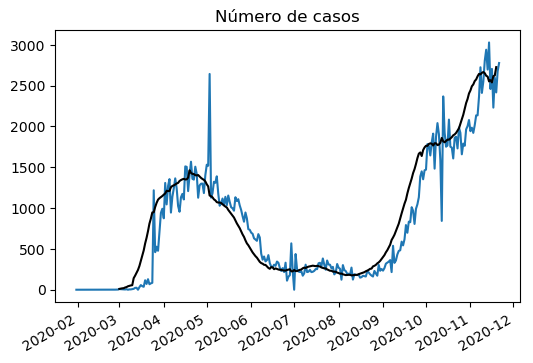

In [5]:
df = pd.read_pickle("data/canada_data.pkl")

cases7 = med_movel(df, -14, 0, "ncases")
deaths7 = med_movel(df, -14, 0, "ndeaths")
#df["cases7"]  = med_movel(df, -14, 0, "ncases")
#df["deaths7"] = med_movel(df, -14, 0, "ndeaths")

plt.subplots(dpi=100)
plt.title("Número de casos")
plt.plot(df["ncases"])
plt.plot(Datas, cases7, "k")
plt.gcf().autofmt_xdate()
df

In [46]:
mobility_file = "data/2020_CA_Region_Mobility_Report.csv"
df2 = pd.read_csv(mobility_file)

df2.query('sub_region_1 in ["Ontario","Quebec"]', inplace=True)
df2["date"] = pd.to_datetime(df2["date"])
df2.sort_values(by=['date'],inplace=True)


date=df2["date"].unique()

#Calcula a média móvel
#mov = [df2.loc[np.logical_and(day - df2["date"] < pd.Timedelta('7 days'), day - df2["date"] >= pd.Timedelta('-7 days')), "workplaces_percent_change_from_baseline"].mean()*-1 for day in date]
mov = [df2.loc[day == df2["date"], "workplaces_percent_change_from_baseline"].mean()*-1 for day in date]

df2=pd.DataFrame({'date':date,'mov':mov})
df2.set_index('date', drop=True, inplace=True)

df2.head()

#df = df[df.index.isin(date)]
#df2 = df2[df2.index.isin(df.index.values)]

,mov
date,
2020-02-15,-1.764706
2020-02-16,-0.820513
2020-02-17,26.146154
2020-02-18,-0.542636
2020-02-19,-1.792308


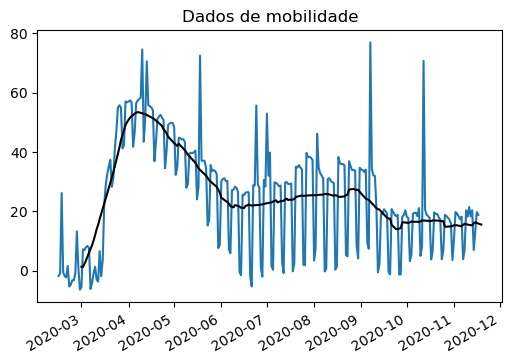

In [47]:
mov7 = med_movel(df2, -14, 14, "mov")

plt.subplots(dpi=100)
plt.title("Dados de mobilidade")
plt.plot(df2["mov"])
plt.plot(Datas, mov7, "k")
plt.gcf().autofmt_xdate()

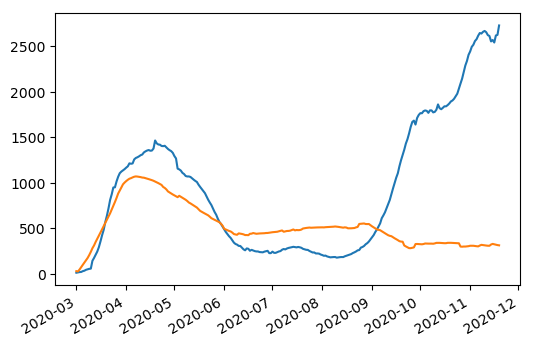

In [48]:
plt.subplots(dpi=100)
plt.plot(Datas, cases7)
plt.plot(Datas, mov7 * 20)
plt.gcf().autofmt_xdate()

https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv

In [51]:
df = pd.DataFrame({'date':Datas, 'cases':cases7, 'deaths':deaths7, 'mov':mov7})
df.set_index('date', drop=True, inplace=True)

df.to_pickle("data.pkl")
df.to_csv("data.csv")
df.head()

,cases,deaths,mov
date,,,
2020-03-01,10.090909,0.090909,1.367307
2020-03-02,14.000000,0.083333,1.227888
2020-03-03,17.166667,0.083333,2.279492
2020-03-04,18.615385,0.153846,3.508053
2020-03-05,27.307692,0.230769,4.840908
